In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
data = pd.read_excel('D:\OneDrive - NITT\Custom_Download\RAC1.xlsx')

In [3]:
data

,NAR ID,Application Name,Assmt ID(RAV),Assmt Due Date(RAV_CA),# Days(RAV),Due Date Bucket,Assmt Status,Task Status,Assmt ID,Due Date RAV,Sign Of Date(RAV),Sign_Of_Date_quarter,Sign_Of_Date_Month,Sign_Of_Date_Year
0,100256-1,abc,321055,5/31/2023,58,Due in 60 days,Created,No Open Task,321055,2022-05-31,2022-05-31,NaN,May,NaN
1,100679-1,xyz,321056,3/31/2023,363,Due in > 90 days,Created,No Open Task,321056,2023-05-31,2023-05-31,NaN,July,NaN
2,101515-1,pqr,321057,7/31/2023,191,Due in > 90 days,Created,No Open Task,321057,2022-06-30,2022-06-30,NaN,November,NaN
3,101614-1,tsh,321059,7/31/2023,303,Due in > 90 days,Created,No Open Task,321059,2022-07-11,2022-07-11,NaN,July,NaN
4,102955-1,cdnc,321058,7/31/2023,88,Due in 90 days or less,Created,No Open Task,321058,2022-05-31,2022-05-31,NaN,July,NaN
5,103055-1,cvds,321055,7/31/2023,68,Due in 90 days or less,Created,No Open Task,321055,2023-05-31,2023-05-31,NaN,July,NaN
6,103955-1,tsdg,321055,7/31/2023,27,Due in 30 days or less,Created,No Open Task,321055,2022-06-30,2022-06-30,NaN,June,NaN
7,103956-1,uyr,321055,7/31/2023,-34,Past Due,Created,No Open Task,321055,2022-07-11,2022-07-11,NaN,June,NaN
8,103959-1,lxy,321055,7/31/2023,-3,Past due,Created,No Open Task,321055,2022-05-12,2022-05-12,NaN,December,NaN
9,103966-1,lmc,321055,5/31/2023,37,Due in 60 days,Created,No Open Task,321055,2022-08-11,2022-08-11,NaN,July,NaN


In [4]:
import random

In [5]:
def plot_graph(df1,title,x,y):
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = []
    for _ in range(len(df1)):
        random_color = (random.random(), random.random(), random.random())
        colors.append(random_color)

    bars = ax.bar(df1[x], df1[y], color=colors)

    # Add count and percentage values inside the bars
    for i, count in enumerate(df1['Count']):
        percentage = df1.loc[i, 'Percentage']
        plt.text(i, df1.loc[i, 'Percentage'], f'{percentage:.2f}%', ha='center', va='bottom')
        plt.text(i, percentage-2, count, ha = 'center')
 

    # Add labels and title
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.show()

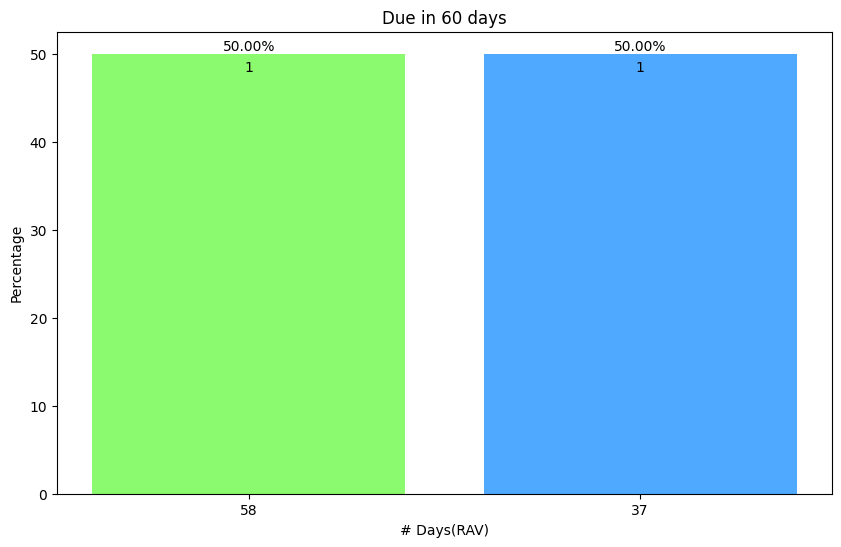

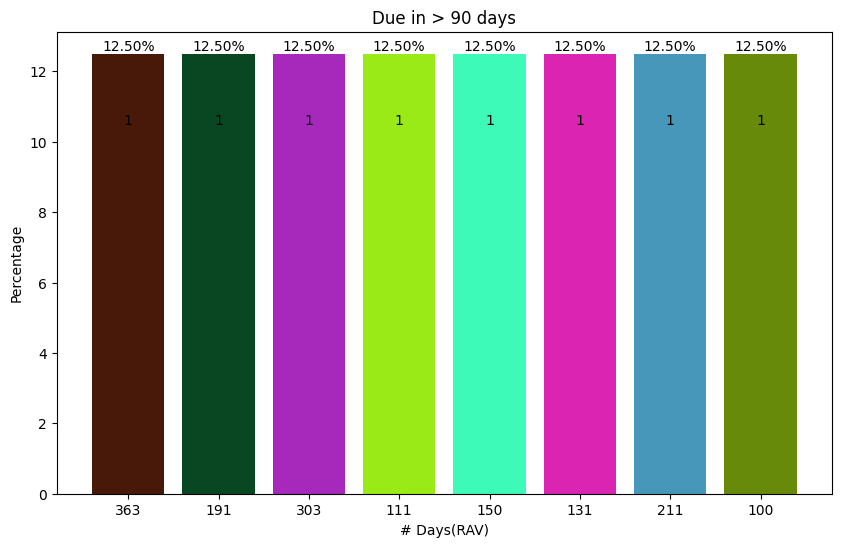

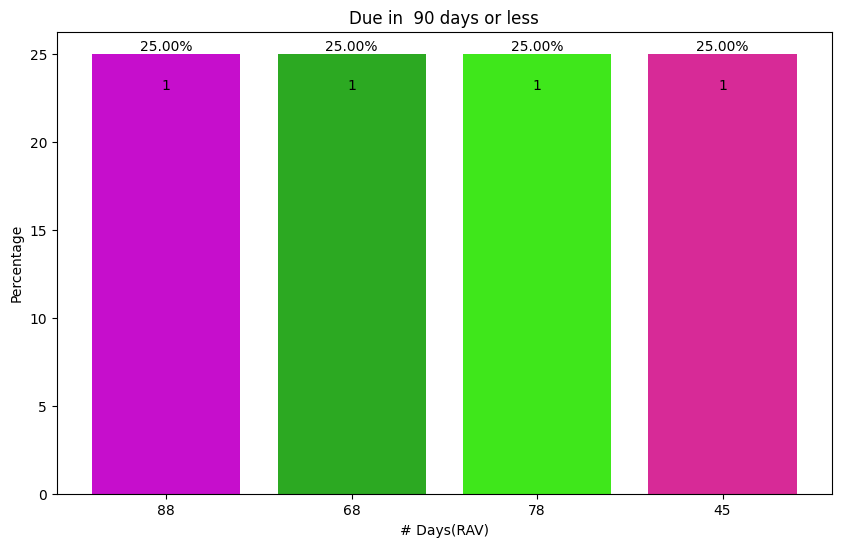

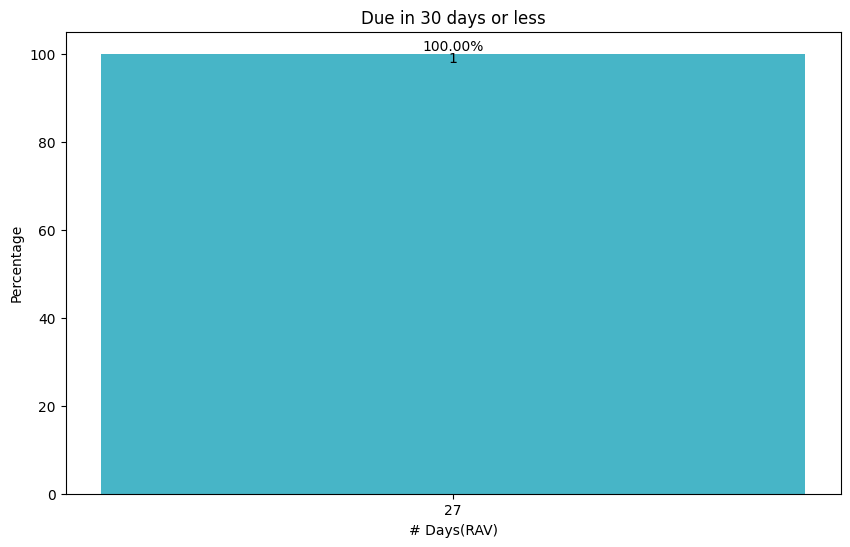

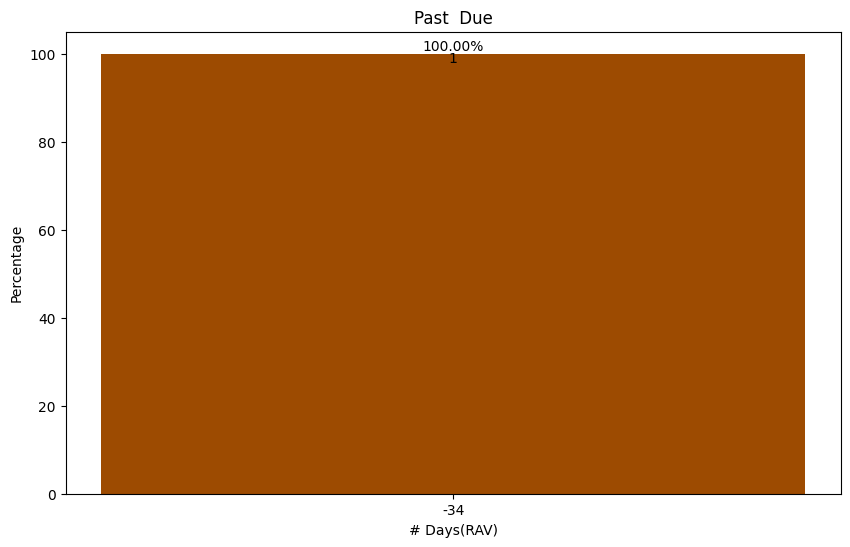

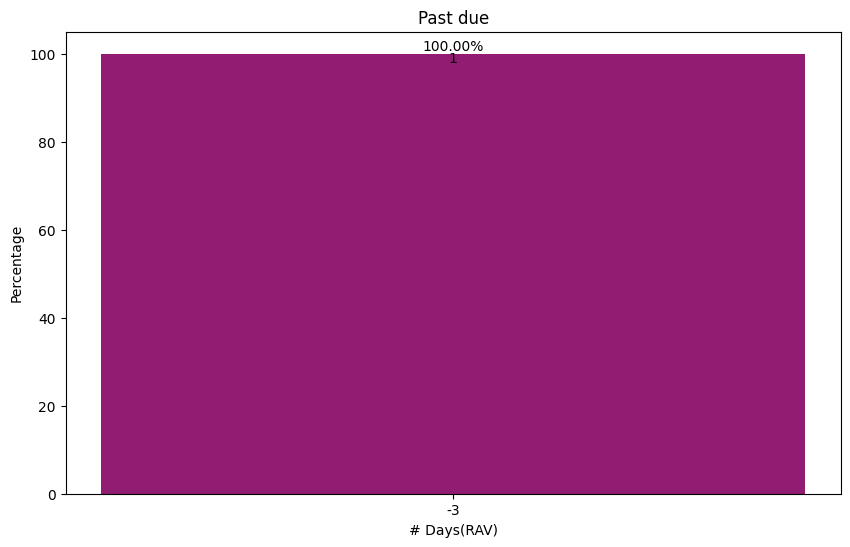

In [6]:
for i in list(data['Due Date Bucket'].unique()):
    df1 = data[data['Due Date Bucket'] == i]['# Days(RAV)'].value_counts().reset_index().rename(columns={'index': '# Days(RAV)', '# Days(RAV)': 'Count'})
    df1['# Days(RAV)'] = df1['# Days(RAV)'].astype('str')
    total = df1['Count'].sum()
    df1['Percentage'] = (df1['Count'] / total) * 100
    plot_graph(df1,i,'# Days(RAV)','Percentage')

In [7]:
grouped_data = data.groupby('Due Date Bucket')['Due Date Bucket'].count()
grouped_data = pd.DataFrame(grouped_data)
grouped_data.columns = ['count']
grouped_data.reset_index(inplace=True)
grouped_data['percent'] = 1/grouped_data['count']*100
grouped_data.drop('count',axis=1,inplace=True)

bucket_percent_map = {}
for indx,line in grouped_data.iterrows():
    key = line['Due Date Bucket']
    val = line['percent']
    bucket_percent_map[key] = val
    
data['percent'] = data['Due Date Bucket'].apply(lambda temp:bucket_percent_map[temp])

In [9]:
data

,NAR ID,Application Name,Assmt ID(RAV),Assmt Due Date(RAV_CA),# Days(RAV),Due Date Bucket,Assmt Status,Task Status,Assmt ID,Due Date RAV,Sign Of Date(RAV),Sign_Of_Date_quarter,Sign_Of_Date_Month,Sign_Of_Date_Year,percent
0,100256-1,abc,321055,5/31/2023,58,Due in 60 days,Created,No Open Task,321055,2022-05-31,2022-05-31,NaN,May,NaN,50.0
1,100679-1,xyz,321056,3/31/2023,363,Due in > 90 days,Created,No Open Task,321056,2023-05-31,2023-05-31,NaN,July,NaN,12.5
2,101515-1,pqr,321057,7/31/2023,191,Due in > 90 days,Created,No Open Task,321057,2022-06-30,2022-06-30,NaN,November,NaN,12.5
3,101614-1,tsh,321059,7/31/2023,303,Due in > 90 days,Created,No Open Task,321059,2022-07-11,2022-07-11,NaN,July,NaN,12.5
4,102955-1,cdnc,321058,7/31/2023,88,Due in 90 days or less,Created,No Open Task,321058,2022-05-31,2022-05-31,NaN,July,NaN,25.0
5,103055-1,cvds,321055,7/31/2023,68,Due in 90 days or less,Created,No Open Task,321055,2023-05-31,2023-05-31,NaN,July,NaN,25.0
6,103955-1,tsdg,321055,7/31/2023,27,Due in 30 days or less,Created,No Open Task,321055,2022-06-30,2022-06-30,NaN,June,NaN,100.0
7,103956-1,uyr,321055,7/31/2023,-34,Past Due,Created,No Open Task,321055,2022-07-11,2022-07-11,NaN,June,NaN,100.0
8,103959-1,lxy,321055,7/31/2023,-3,Past due,Created,No Open Task,321055,2022-05-12,2022-05-12,NaN,December,NaN,100.0
9,103966-1,lmc,321055,5/31/2023,37,Due in 60 days,Created,No Open Task,321055,2022-08-11,2022-08-11,NaN,July,NaN,50.0
